In [1]:
import numpy as np
from skimage import io, color
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

https://www.ic.unicamp.br/~helio/disciplinas/MO443/trabalho2.pdf

## Reading the image

In [2]:
channel = 2

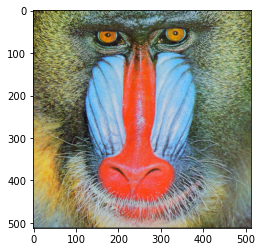

In [3]:
image = cv2.imread('baboon.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [4]:
img.shape

(512, 512, 3)

### Converting to HSV

In [5]:
lab = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
lab.shape

(512, 512, 3)

## Scrolling through the image

In [6]:
#Set the luminance channel to be used
luminance = lab[:,:,channel]

In [7]:
def create_middle_tons(luminance, mask, limit=3):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image

#     norm_luminance = luminance/255
    g = np.round(luminance/255)
    
    for row in tqdm(range(luminance.shape[0]-limit)):
        for collumn in range(luminance.shape[1]-limit):

            erro = (luminance[row][collumn] - g[row][collumn])

            #Applyig the mask
            luminance = mask(luminance, erro, row, collumn)

    #Return the value to original form
    return luminance*255

In [8]:
def create_middle_tons_zigzag(luminance, mask, limit=3):
    """
    Loop to apply the middle tons mask in each pixel of the image
    """
    #loop to check all pixels of the image

    norm_luminance = luminance/255
    g = np.round(norm_luminance)
    
    for row in tqdm(range(luminance.shape[0]-limit)):
        if row%2 == 0:    
            for collumn in range(luminance.shape[1]-limit):

                erro = (luminance[row][collumn] - g[row][collumn])

                #Applyig the mask
                luminance = mask(luminance, erro, row, collumn)
        else:
            for collumn in range(luminance.shape[1]-limit, limit, -1):

                erro = (luminance[row][collumn] - g[row][collumn])

                #Applyig the mask
                luminance = mask(luminance, erro, row, collumn, -1)
    
    #Return the value to original form
    return luminance*255

## Mask functions

In [9]:
def mask_Steinberg(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Floyd e Steinberg in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,-1,0,1]*zizag
    idx_collumns = [0,1,1,1]
    erro_tax = [7/16,3/16,5/16,1/16]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)*255
    
    return luminance 

In [10]:
def mask_Stevenson(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Stevenson in a pixel of the image, and return the luminance and erro;
    """
    
    idx_rows = [2,-3,-1,1,3,-2,0,+2,-3,-1,1,3]*zizag
    idx_collumns = [0,1,1,1,1,2,2,2,3,3,3,3]
    erro_tax = [32/200, 12/200, 26/200, 30/200, 16/200, 12/200, 26/200, 12/200, 5/200, 12/200, 12/200, 5/200]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)

    
    return luminance 

In [11]:
def mask_Burkes(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Burkes in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1]
    erro_tax = [8/32,4/32,2/32,4/32,8/32,4/32,2/32]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

In [12]:
def mask_Sierra(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-1,0,1]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2]
    erro_tax = [5/32,3/32,2/32,4/32,5/32,4/32,2/32,2/32,3/32,2/32]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

In [13]:
def mask_Stucki(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2,2,2]
    erro_tax = [8/42,4/42,2/42,4/42,8/42,4/42,2/42,1/42,2/42,4/42,2/42,1/42]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
        
    
    return luminance 

In [14]:
def mask_Jarvis(luminance, erro, row, collumn, zizag=1):
    """
    Apply the Sierra in a pixel of the image, and return the luminance and erro;
    """
    idx_rows = [1,2,-2,-1,0,1,2,-2,-1,0,1,2]*zizag
    idx_collumns = [0,0,1,1,1,1,1,2,2,2,2,2]
    erro_tax = [7/48, 5/48,3/48,5/48,7/48,5/48,3/48,1/48,3/48,5/48,3/48,1/48]
    
    for index in zip(idx_rows, idx_collumns, erro_tax):
        luminance[row+index[0], collumn+index[1]] += (index[2]*erro)
    
    return luminance 

## Aplying the masks

In [41]:
def apply_mask(mask, zigzag=True):
    """
    Apply the mask that was passed by paramet in the in img, and plot 
    these result for a normal way and zizag path.
    """
    lab_mask = lab.copy()
    luminance_mask = luminance.copy()
    
    luminance_mask = create_middle_tons(luminance_mask, mask)
    lab_mask[:,:,channel] = luminance_mask
    
    if zigzag:
        lab_mask_zigzag = lab.copy()
        luminance_mask_zigzag = luminance.copy()
        
        luminance_mask_zigzag = create_middle_tons_zigzag(luminance_mask_zigzag, mask)
        lab_mask_zigzag[:,:,channel] = luminance_mask_zigzag
        
        #Plot the results for zigzag
        fig, (ax0, ax1, ax2) = plt.subplots(ncols=3, figsize=(15, 8))
        ax0.imshow(img)
        ax0.set_title("Original Image")

        img_copy = cv2.cvtColor(lab_mask, cv2.COLOR_HSV2RGB)
        ax1.imshow(img_copy)
        ax1.set_title("Mask applied")

        img_copy_zigzag = cv2.cvtColor(lab_mask_zigzag, cv2.COLOR_HSV2RGB)
        ax2.imshow(img_copy_zigzag)
        ax2.set_title("Mask applied in ZigZag")

    else:
       #Plot the results when zigzag is False
        fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 8))
        ax0.imshow(img)
        ax0.set_title("Original Image")

        img_copy = cv2.cvtColor(lab_mask, cv2.COLOR_HSV2RGB)
        ax1.imshow(img_copy)
        ax1.set_title("Mask applied")


100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:05<00:00, 85.75it/s]


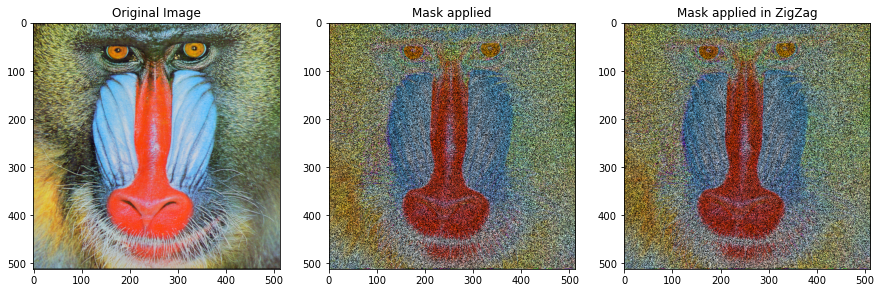

In [16]:
#Result Steinberg
apply_mask(mask_Steinberg, True)

100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:12<00:00, 41.33it/s]


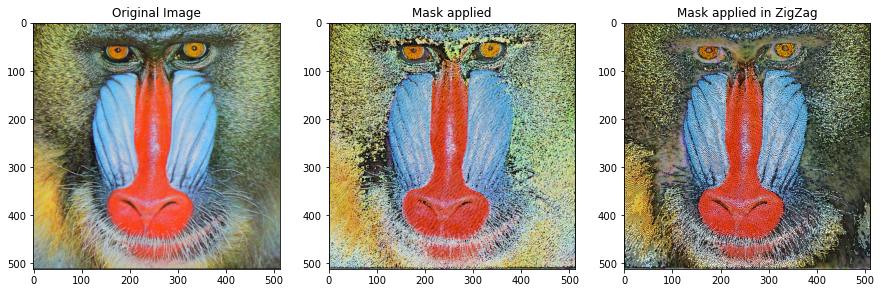

In [17]:
#Stevenson e Arce Result
apply_mask(mask_Stevenson, True)

100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:12<00:00, 40.39it/s]


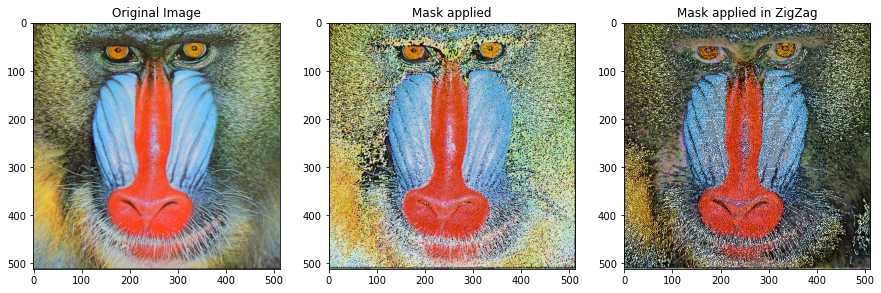

In [18]:
#Jarvis Result
apply_mask(mask_Jarvis, True)

100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:07<00:00, 64.48it/s]


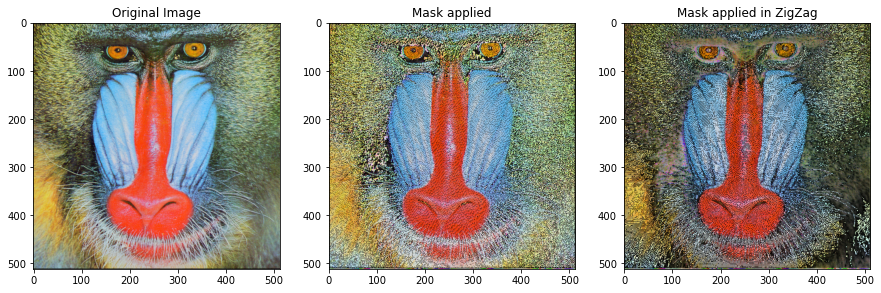

In [19]:
#Burkes Result
apply_mask(mask_Burkes, True)

100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:10<00:00, 50.82it/s]


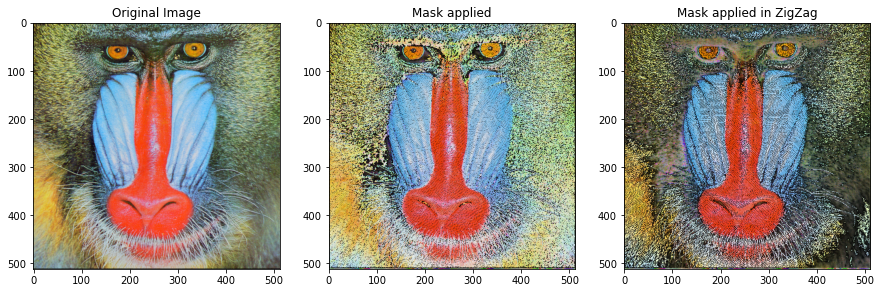

In [20]:
#Sierra Result
apply_mask(mask_Sierra, True)

100%|████████████████████████████████████████████████████████████████████████████████| 509/509 [00:13<00:00, 39.08it/s]


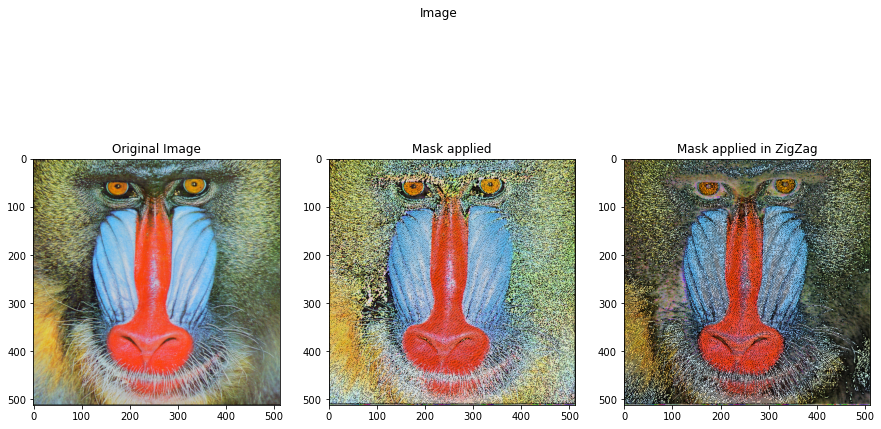

In [42]:
#Stucki Result
apply_mask(mask_Stucki, True)

<function mask_Stucki at 0x000001D16516FE50>
